<a href="https://colab.research.google.com/github/diogoscsilva/ConfusionMatrix/blob/main/ConfusionMatriz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [ ]:
%load_ext tensorboard

In [ ]:
logdir='log'

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8914 - loss: 0.3491 - val_accuracy: 0.9874 - val_loss: 0.0416
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9844 - loss: 0.0522 - val_accuracy: 0.9863 - val_loss: 0.0384
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9889 - loss: 0.0339 - val_accuracy: 0.9842 - val_loss: 0.0482
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9925 - loss: 0.0248 - val_accuracy: 0.9910 - val_loss: 0.0307
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9934 - loss: 0.0205 - val_accuracy: 0.9919 - val_loss: 0.0258


In [ ]:
y_true=test_labels
y_pred=np.argmax(model.predict(test_images), axis=1)
classes=[0,1,2,3,4,5,6,7,8,9]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
print(y_pred)

[7 2 1 ... 4 5 6]


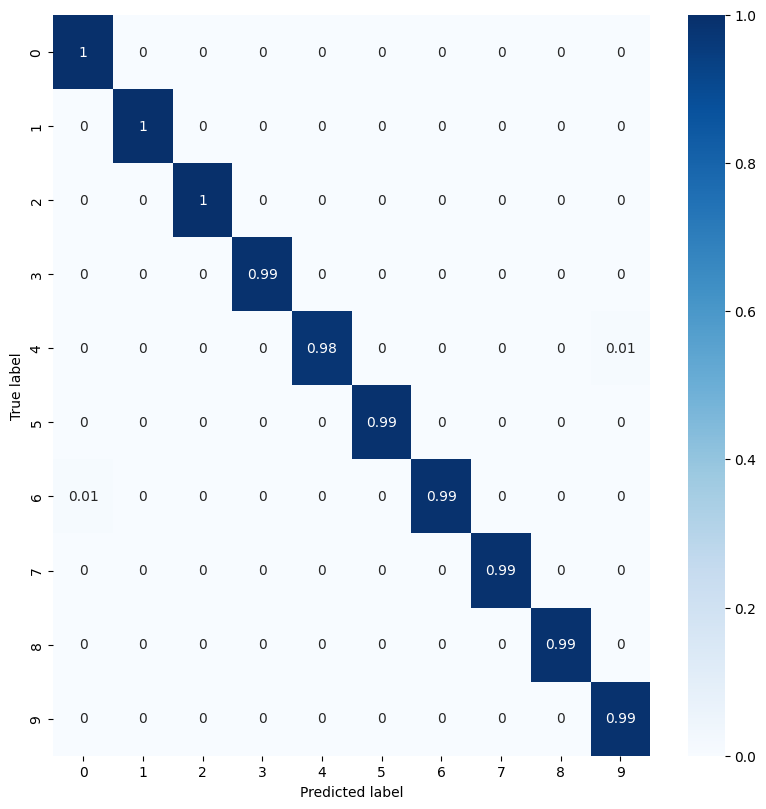

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Número de classes
num_classes = con_mat.shape[0]

# Calcula métricas para cada classe
for c in range(num_classes):
    true_positives = con_mat[c, c]
    false_positives = np.sum(con_mat[:, c]) - true_positives
    false_negatives = np.sum(con_mat[c, :]) - true_positives
    true_negatives = np.sum(con_mat) - true_positives - false_positives - false_negatives
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (false_positives + true_negatives)
    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    precision = true_positives / (true_positives + false_positives)
    f_score = 2 * (precision *  sensitivity) / (precision + sensitivity)
    print(f"Classe {c}:")
    print(f"  Sensibilidade: {sensitivity}")
    print(f"  Especificidade: {specificity}")
    print(f"  Acurácia: {accuracy}")
    print(f"  Precisão: {precision}")
    print(f"  F-score: {f_score}")
    print("-" * 20)

Classe 0:
  Sensibilidade: 0.9979591836734694
  Especificidade: 0.9990022172949002
  Acurácia: 0.9989
  Precisão: 0.9908814589665653
  F-score: 0.9944077275038129
--------------------
Classe 1:
  Sensibilidade: 0.9982378854625551
  Especificidade: 0.999210377890581
  Acurácia: 0.9991
  Precisão: 0.993859649122807
  F-score: 0.9960439560439561
--------------------
Classe 2:
  Sensibilidade: 0.9961240310077519
  Especificidade: 0.9988849241748439
  Acurácia: 0.9986
  Precisão: 0.9903660886319846
  F-score: 0.9932367149758453
--------------------
Classe 3:
  Sensibilidade: 0.9910891089108911
  Especificidade: 0.9993325917686318
  Acurácia: 0.9985
  Precisão: 0.9940417080436942
  F-score: 0.992563212692117
--------------------
Classe 4:
  Sensibilidade: 0.9826883910386965
  Especificidade: 0.9996673320026613
  Acurácia: 0.998
  Precisão: 0.996900826446281
  F-score: 0.9897435897435898
--------------------
Classe 5:
  Sensibilidade: 0.9899103139013453
  Especificidade: 0.9986824769433466
  